# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [30]:
#Your code here
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
import keras

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Colab\ Notebooks/


/content/drive/MyDrive/Colab Notebooks


In [7]:
dir = 'cnn_week3/'

data = tf.keras.preprocessing.image_dataset_from_directory(
    dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42
)

Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [10]:
data_iterator=data.as_numpy_iterator()

In [12]:
batch=data_iterator.next()

In [18]:
batch[0].shape

(32, 256, 256, 3)

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

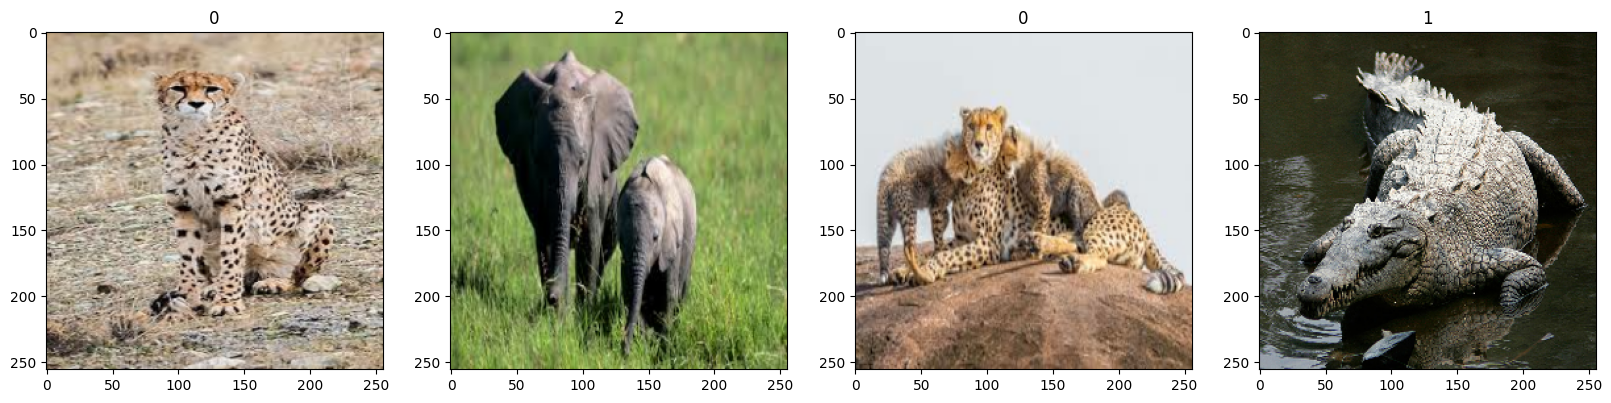

In [20]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [22]:
# Normalization function
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

data=data.map(lambda x, y: normalize(x, y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [27]:
#Your code here

# Calculate the total number of batches
total_size = tf.data.experimental.cardinality(data).numpy()
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

print(f'Total batches: {total_size}')
print(f'Training size: {train_size}')
print(f'Validation size: {val_size}')
print(f'Test size: {test_size}')


# Create the training dataset
train_df = data.take(train_size)

# Create the remaining dataset for validation and test
remaining_df = data.skip(train_size)

# Create the validation dataset
val_df = remaining_df.take(val_size)

# Create the test dataset
test_df = remaining_df.skip(val_size)


Total batches: 52
Training size: 41
Validation size: 5
Test size: 6


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [38]:
def my_model():
    inputs = keras.Input(shape=(256, 256, 3))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Dense(128)(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model= my_model()

In [39]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 tf.nn.relu_6 (TFOpLambda)   (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      1849

**Q.6** Compile your model

In [40]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
              )

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [41]:
model.fit(train_df,
    validation_data=val_df,
    epochs=20
          )

Epoch 1/20
41/41 [==============================] - 32s 576ms/step - loss: 1.2937 - accuracy: 0.4139 - val_loss: 1.4369 - val_accuracy: 0.3438
Epoch 2/20
41/41 [==============================] - 28s 644ms/step - loss: 0.9767 - accuracy: 0.5930 - val_loss: 1.7249 - val_accuracy: 0.3063
Epoch 3/20
41/41 [==============================] - 28s 642ms/step - loss: 0.7630 - accuracy: 0.6974 - val_loss: 1.8932 - val_accuracy: 0.3063
Epoch 4/20
41/41 [==============================] - 27s 625ms/step - loss: 0.5822 - accuracy: 0.7858 - val_loss: 2.5564 - val_accuracy: 0.3688
Epoch 5/20
41/41 [==============================] - 34s 809ms/step - loss: 0.4076 - accuracy: 0.8598 - val_loss: 2.0948 - val_accuracy: 0.3625
Epoch 6/20
41/41 [==============================] - 26s 608ms/step - loss: 0.2585 - accuracy: 0.9215 - val_loss: 1.8862 - val_accuracy: 0.3938
Epoch 7/20
41/41 [==============================] - 27s 624ms/step - loss: 0.1547 - accuracy: 0.9512 - val_loss: 1.6856 - val_accuracy: 0.4563

**Q.8** Test your code with test set

In [42]:
loss,accuracy=model.evaluate(test_df)
loss, accuracy

6/6 [==============================] - 13s 75ms/step - loss: 0.3560 - accuracy: 0.9135


(0.3559788465499878, 0.9135135412216187)

In [43]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9135135412216187


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**